## Carnegie Mellon Probability & Statistics (Open + Free)

The following contains the python code for examples and challenges throughout the class. Solution for examples and challenges are provided in R so I decided to write them in Python using numpy and pandas.

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Drawing Pie Chart

In [4]:
friends = pd.read_excel('https://oli.cmu.edu/repository/webcontent/8aaa78340a0001dc5574e39e401d2529/_u2_summarizing_data/webcontent/excel/friends.xls')

In [76]:
friends.head()

,Friends
0,Opposite sex
1,No difference
2,Opposite sex
3,No difference
4,Opposite sex


In [51]:
friends['Friends'].value_counts().to_frame().reset_index()['index']

0    No difference
1     Opposite sex
2         Same sex
Name: index, dtype: object

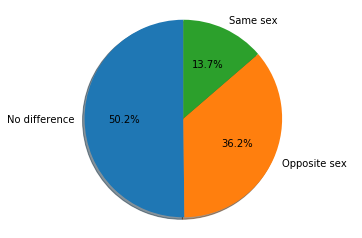

In [52]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = friends['Friends'].value_counts().to_frame().reset_index()['index']
sizes = friends['Friends'].value_counts().to_frame().reset_index()['Friends']
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


# Drawing Histogram

In [87]:
oscars = pd.read_excel('https://oli.cmu.edu/repository/webcontent/8aaa78340a0001dc5574e39e401d2529/_u2_summarizing_data/webcontent/excel/actor_2013.xls')
oscars.head()

,Age
0,43
1,42
2,48
3,49
4,56


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1129038be0>]], dtype=object)

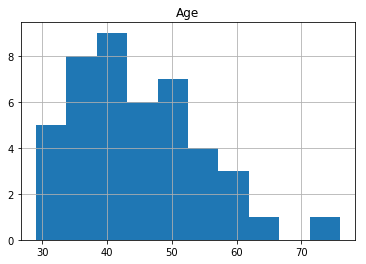

In [103]:
oscars.hist()


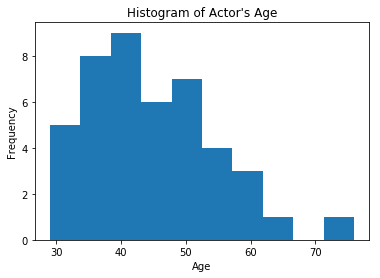

In [112]:
oscars.Age.plot(kind='hist',title='Histogram of Actor\'s Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [124]:
oscars['Age'].mode()

0    37
1    38
2    42
3    45
4    60
dtype: int64

In [118]:
!head actress.csv


In [119]:
actress = pd.read_csv('actress.csv')

In [131]:
actress['Age'].mode()

0    33
dtype: int64

In [132]:
actress['Age'].mean()

38.340909090909093

In [135]:
df = pd.DataFrame({'A': [1, 6, 7, 5, 5, 8, 11, 12, 15]})


In [138]:
df.mean()

A    7.777778
dtype: float64

# Question 1
A recent survey asked 90 students, How many hours do you spend on the computer in a typical day?
Of the 90 respondents, 3 said 1 hour, 5 said 2 hours, 15 said 3 hours, 25 said 4 hours, 20 said 5 hours, 15 said 6 hours, 5 said 7 hours, 1 said 8 hours, and 1 said 9 hours.
What is the average (mean) number of hours spent on the computer?

In [140]:
students = pd.DataFrame({'No':[3,5,15,25,20,15,5,1,1], \
                         'Hour':[1,2,3,4,5,6,7,8,9]})

In [141]:
students

,Hour,No
0,1,3
1,2,5
2,3,15
3,4,25
4,5,20
5,6,15
6,7,5
7,8,1
8,9,1


In [142]:
students['Total Hour'] = students['Hour'] * students['No']

In [143]:
students

,Hour,No,Total Hour
0,1,3,3
1,2,5,10
2,3,15,45
3,4,25,100
4,5,20,100
5,6,15,90
6,7,5,35
7,8,1,8
8,9,1,9


In [146]:
students['Total Hour'].sum()/students['No'].sum()

4.4444444444444446

In [150]:
np.average(students['Hour'], weights=students['No'])

4.4444444444444446

# Question 2
Here are the number of hours that 9 students spend on the computer on a typical day: 
1 6 7 5 8 5 11 12 15
What is the median number of hours spent on the computer?

In [151]:
df = pd.DataFrame([1,6,7,5,8,5,11,12,15])

In [152]:
df.median()

0    7.0
dtype: float64

# Boxplot
The objectives of this activity are: 
 - To teach you how to produce side-by-side boxplots and the relevant descriptive statistics,
 - To let you practice comparing and contrasting distributions, and
 - To help you gain more intuition about variability through the interpretation of your results in context.
 
The percentage of each entering Freshman class that graduated on time was recorded for each of six colleges at a major university over a period of several years. (Source: This data is distributed with the software package, Data Desk. (1993). Ithaca, NY: Data Description, Inc., and appears in http://lib.stat.cmu.edu/DASL/)

In order to compare the graduation rates among the different colleges, we will create side-by-side boxplots (graduation rate by college), and supplement the graph with numerical measures. Follow the instructions, and then answer the questions based on the output you got. 

In [162]:
college = pd.read_excel('https://oli.cmu.edu/repository/webcontent/8aaa78340a0001dc5574e39e401d2529/_u2_summarizing_data/webcontent/excel/graduation.xls')

In [165]:
college.head()

,College,%_grad_on_time
0,A,57.6
1,A,43.2
2,A,49.6
3,A,51.4
4,A,69.9


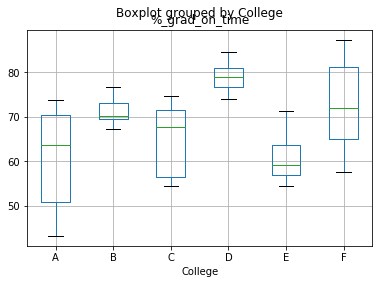

In [166]:
college.boxplot(column='%_grad_on_time',by='College')

### Center:
Of the six colleges, college D has the highest median graduation rate (M = 79), followed by colleges F (M = 72), B (M = 70.15), C (M = 67.65), A (M = 63.75) and college E (M = 59.15).
### Spread:
College B has the smallest variation in graduation rates over the years (range = 9.4%, IQR = 3.5%). College D's graduation rates are also pretty consistent over the years (range = 10.5%, IQR = 4.45%). A larger variation in graduation rates is found in colleges E and C, and the least consistency in graduation rates (i.e., largest variation) is found in college A (range = 30.6%, IQR = 19.55%) and college F (range = 29.7%, IQR = 16.23%). 
None of the graduation rates distributions have outliers

**If you had to choose one college among the six colleges based on this data, which college would it be? Explain your reasoning.**

If I had to choose one college based on the graduation rates, I would choose college D. Not only does this college have the largest median graduation rates, but it also has the smallest variation in graduation rates over the years. This means that even in years when college D has a relatively small graduation rate, it is not MUCH smaller than the median (min = 74.1%, Median = 79%), and is still higher than most graduation rates at the other colleges. In particular, the smallest graduation rate that occurred in college D (74.1%), is still higher than: 
 - the highest graduation rate at colleges A and E, 
 - the third quartile of the distribution of graduation rates at colleges B and C, and 
 - the median graduation rate at college F.
 
** If you were debating between colleges B and F only, which one would you choose based on this data? Explain your reasoning. **

While Colleges B and F have about the same median graduation rate (B: 70.15%, F: 72%), there is a big difference in the variation. College F has a very large variation, and therefore a much less consistent gradation rate over the years (it can get as low as 57.7%). College B, on the other hand, has a much more consistent graduation rate (small variability), and in that sense, college B is less "risky." Since I am not a "risk taker," and since both colleges have approximately the same median graduation rate, my choice between the two would be college B.